In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_context("notebook", rc={"lines.linewidth": 3})
##################################################
plt.style.use('tableau-colorblind10')
##################################################

In [2]:
sampleGroup = "primaryNivo"

In [3]:
df_nd = pd.read_csv(f"all_sample_{sampleGroup}_edge_number.r_filter.txt",sep=" ",header=None)
#df_nd = pd.read_csv(f"all_sample_{sampleGroup}_edge_number.k10_z1.txt",sep=" ",header=None)
#df_nd = pd.read_csv(f"all_sample_{sampleGroup}_edge_number.0_1.txt",sep=" ",header=None)
#df_nd = pd.read_csv(f"all_sample_{sampleGroup}_edge_number.above0.txt",sep=" ",header=None)
#df_nd = pd.read_csv(f"all_sample_{sampleGroup}_edge_number.above1.txt",sep=" ",header=None)
df_cl = pd.read_csv("../braun_data_log2_or_not/braun_data_clinical_data.csv")
df_os = pd.merge(df_nd,df_cl,how='left', left_on=0, right_on="RNA_ID")

In [4]:
df_os.sort_values(by="Benefit",inplace=True)
import seaborn as sns
from scipy.stats import zscore
colors = df_os["Benefit"].replace("ICB","yellow").replace("NCB","red").replace("CB","green").tolist()
df_sns_temp = df_os[[0,1,2]]
df_sns_temp.set_index(0,inplace=True)
df_sns_temp[1] = zscore(df_sns_temp[1])
df_sns_temp[2] = zscore(df_sns_temp[2])
#sns.clustermap(df_sns_temp,method="weighted",row_colors= colors,row_cluster=False)

/tmp/ipykernel_57851/2941694849.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sns_temp[1] = zscore(df_sns_temp[1])
/tmp/ipykernel_57851/2941694849.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sns_temp[2] = zscore(df_sns_temp[2])


In [5]:
import numpy as np
import scipy
nd_cb = df_os[df_os["Benefit"]=="CB"][[1,2]]
nd_ncb = df_os[df_os["Benefit"]=="NCB"][[1,2]]
nd_icb = df_os[df_os["Benefit"]=="ICB"][[1,2]]
nd_cb_minus =  nd_cb[1] - nd_cb[2]
nd_ncb_minus =  nd_ncb[1] - nd_ncb[2]
nd_icb_minus =  nd_icb[1] - nd_icb[2]


0.12427212777883535
0.11698818138214821
0.11478296086258957
TtestResult(statistic=2.8870102223206255, pvalue=0.004892866801741933, df=88.0)
TtestResult(statistic=3.481524601915739, pvalue=0.0007896783301290833, df=85.0)
TtestResult(statistic=-0.6642950888915842, pvalue=0.5082582963228897, df=87.0)
RanksumsResult(statistic=3.0026700536039685, pvalue=0.0026762240794026603)
RanksumsResult(statistic=3.285486491770025, pvalue=0.0010180642386194714)
RanksumsResult(statistic=-0.5829275395334123, pvalue=0.5599420805164714)


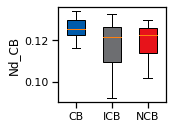

In [10]:
#compare network distance from cb network
import matplotlib as mpl
print(np.mean(nd_cb[1]))
print(np.mean(nd_ncb[1]))
print(np.mean(nd_icb[1]))

#cb vs ncb
print(scipy.stats.ttest_ind(nd_cb[1],nd_ncb[1],\
                            equal_var=[scipy.stats.levene(nd_cb[2],nd_ncb[2])[1] > 0.05]))
#cb vs icb
print(scipy.stats.ttest_ind(nd_cb[1],nd_icb[1],\
                            equal_var=[scipy.stats.levene(nd_cb[2],nd_icb[2])[1] > 0.05]))
#icb vs ncb
print(scipy.stats.ttest_ind(nd_icb[1],nd_ncb[1],\
                            equal_var=[scipy.stats.levene(nd_icb[2],nd_ncb[2])[1] > 0.05]))

#cb vs ncb
print(scipy.stats.ranksums(nd_cb[1],nd_ncb[1]))
#cb vs icb
print(scipy.stats.ranksums(nd_cb[1],nd_icb[1]))
#icb vs ncb
print(scipy.stats.ranksums(nd_icb[1],nd_ncb[1]))

from gseapy import barplot, dotplot
import scienceplots
plt.rc('font', family='DejaVu Sans')

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(2.5, 1.9))

bplot1 = axs.boxplot([nd_cb[1],nd_icb[1], nd_ncb[1]],patch_artist=True, widths =0.5,
            showfliers=False,meanline=True,medianprops=None)

colors =  ['#005baa','#6d6e71','#E7131A']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
        
axs.xaxis.set_ticks([1,2,3])
axs.set_xticklabels(["CB","ICB","NCB"])
axs.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2f}'))
"""
y, h, col = nd_cb[1].max() + 0.2, 0.2, 'k'
x1, x2 = 1, 2
axs.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)
"""
plt.ylabel('Nd_CB')
#plt.yticks(rotation=90, ha='center', rotation_mode='anchor')
plt.tight_layout()
plt.savefig(f'f1_{sampleGroup}_cb.tif',dpi=600)
plt.savefig(f'f1_{sampleGroup}_cb.svg',dpi=600)

0.20410788664818796
0.22436812559099775
0.20586309307301082
TtestResult(statistic=-4.234047826386269, pvalue=5.623212023851648e-05, df=88.0)
TtestResult(statistic=-0.2719823780177504, pvalue=0.7862951191780666, df=85.0)
TtestResult(statistic=-3.6392558317641113, pvalue=0.00046322536643880947, df=87.0)


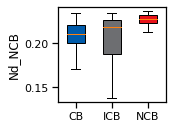

In [11]:
#compare network distance from ncb network
print(np.mean(nd_cb[2]))
print(np.mean(nd_ncb[2]))
print(np.mean(nd_icb[2]))

#cb vs ncb
print(scipy.stats.ttest_ind(nd_cb[2],nd_ncb[2],\
                            equal_var=[scipy.stats.levene(nd_cb[2],nd_ncb[2])[1] > 0.05]))
#cb vs icb
print(scipy.stats.ttest_ind(nd_cb[2],nd_icb[2],\
                            equal_var=[scipy.stats.levene(nd_cb[2],nd_icb[2])[1] > 0.05]))
#icb vs ncb
print(scipy.stats.ttest_ind(nd_icb[2],nd_ncb[2],\
                            equal_var=[scipy.stats.levene(nd_icb[2],nd_ncb[2])[1] > 0.05]))

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(2.5, 1.9))

#axs.violinplot([nd_cb[2],nd_icb[2], nd_ncb[2]],showmeans=False,showmedians=True)
bplot1 = axs.boxplot([nd_cb[2],nd_icb[2], nd_ncb[2]],patch_artist=True, widths =0.5,
            showfliers=False,meanline=True,medianprops=None)

colors =  ['#005baa','#6d6e71','#E7131A']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
        
axs.xaxis.set_ticks([1,2,3])
axs.set_xticklabels(["CB","ICB","NCB"])
axs.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2f}'))
plt.ylabel('Nd_NCB')
plt.tight_layout()
plt.savefig(f'f1_{sampleGroup}_ncb.tif',dpi=600)
plt.savefig(f'f1_{sampleGroup}_ncb.svg',dpi=600)
#plt.boxplot([nd_cb[2],nd_icb[2], nd_ncb[2]])

-0.0798357588693526
-0.09108013221042123
-0.10737994420884957
tar -0.0943236231051944
TtestResult(statistic=7.148757139686714, pvalue=2.4442546841997335e-10, df=88.0)
TtestResult(statistic=2.534940105243141, pvalue=0.013078192767435012, df=85.0)
TtestResult(statistic=5.1295031709185865, pvalue=1.7427352510743616e-06, df=87.0)


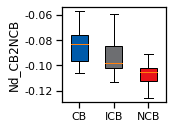

In [12]:
#compare network distance from cb network to ncb network
print(np.mean(nd_cb_minus))
print(np.mean(nd_icb_minus))
print(np.mean(nd_ncb_minus))

print("tar",(np.median(nd_cb_minus)+np.median(nd_ncb_minus))/2)
#cb vs ncb

print(scipy.stats.ttest_ind(nd_cb_minus,nd_ncb_minus,\
                            equal_var=[scipy.stats.levene(nd_cb_minus,nd_ncb_minus)[1] > 0.05]))
#cb vs icb

print(scipy.stats.ttest_ind(nd_cb_minus,nd_icb_minus,\
                            equal_var=[scipy.stats.levene(nd_cb_minus,nd_icb_minus)[1] > 0.05]))
#icb vs ncb

print(scipy.stats.ttest_ind(nd_icb_minus,nd_ncb_minus,\
                            equal_var=[scipy.stats.levene(nd_icb_minus,nd_ncb_minus)[1] > 0.05]))


fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(2.5, 1.9))

#axs.violinplot([nd_cb_minus,nd_icb_minus,nd_ncb_minus],showmeans=False,  showmedians=True)
bplot1 = axs.boxplot([nd_cb_minus,nd_icb_minus,nd_ncb_minus],patch_artist=True, widths =0.5,
            showfliers=False,meanline=True,medianprops=None)

colors =  ['#005baa','#6d6e71','#E7131A']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
        
axs.xaxis.set_ticks([1,2,3])
axs.set_xticklabels(["CB","ICB","NCB"])
axs.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2f}'))
plt.ylabel('Nd_CB2NCB')
#plt.yticks(rotation=30, ha='center', rotation_mode='anchor')
plt.tight_layout()
plt.savefig(f'f1_{sampleGroup}_normalized.tif',dpi=600)
plt.savefig(f'f1_{sampleGroup}_normalized.svg',dpi=600)

In [13]:
df_os["nd"] = (df_os[1] - df_os[2])*100
df_os["nd"]

105    -6.591598
25     -6.608222
26     -7.954102
27     -8.909007
28     -9.255090
         ...    
86    -11.202843
90    -10.321056
91    -10.126473
50    -11.092329
66     -9.136021
Name: nd, Length: 133, dtype: float64

In [14]:
df_os["nd"] = (df_os[1] - df_os[2])*100
#df_os["nd"] = df_os[1]*100
fos = open("cph_os.txt","a")
ffps = open("cph_fps.txt","a")
from lifelines import CoxPHFitter
df_os1 = df_os[["nd",'OS', 'OS_CNSR']]
cph = CoxPHFitter()
cph.fit(df_os1, duration_col='OS', event_col='OS_CNSR')

print("-------OS --------",cph.summary)
fos.write(sampleGroup+"\t"+"\t".join([str(i) for i in cph.summary.values.tolist()[0]])+"\n")

df_os1 = df_os[["nd",'PFS', 'PFS_CNSR']]
cph = CoxPHFitter()
cph.fit(df_os1, duration_col='PFS', event_col='PFS_CNSR')

print("-------PFS --------",cph.summary)
ffps.write(sampleGroup+"\t"+"\t".join([str(i) for i in cph.summary.values.tolist()[0]])+"\n")
fos.close()
ffps.close()

-------OS --------                coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                  
nd        -0.290193   0.748119  0.069226       -0.425873       -0.154513   

           exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                               
nd                    0.653199             0.856832     0.0 -4.191989   

                  p   -log2(p)  
covariate                       
nd         0.000028  15.142258  
-------PFS --------                coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                  
nd        -0.240559   0.786188  0.058006       -0.354248       -0.126869   

           exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                               
nd                    0.701701        

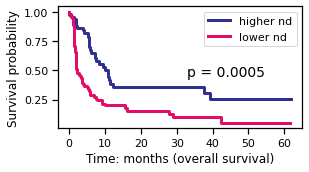

In [15]:
#OS survival analysis
%matplotlib inline
from lifelines.plotting import add_at_risk_counts
from lifelines import KaplanMeierFitter
from lifelines.datasets import load_waltons
from sksurv.compare import compare_survival
import numpy as np
from lifelines.plotting import add_at_risk_counts

tar ="nd"
determined_diff = (np.median(nd_cb_minus)+np.median(nd_ncb_minus))/2 * 100
#### log rank test 
y = df_os[["OS_CNSR","OS"]].values
y = np.array([ (i[0],i[1]) for i in y],dtype="bool,f")
group_indicator = ["high" if i > determined_diff else "low" for i in df_os[tar]] 
#print(group_indicator)
chi2, pvalue= compare_survival(y,group_indicator)


ix = ix = df_os[tar] >= determined_diff

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.3, 2.5))



kmf_control = KaplanMeierFitter()
ax = kmf_control.fit(df_os.loc[ix]["PFS"], df_os.loc[ix]["OS_CNSR"], label='higher nd').plot_survival_function(ax=ax,ci_show =False,color='#2e3092')

kmf_exp = KaplanMeierFitter()
ax = kmf_exp.fit(df_os.loc[~ix]["PFS"], df_os.loc[~ix]["OS_CNSR"], label='lower nd').plot_survival_function(ax=ax,ci_show =False,color='#e40c69')



#add_at_risk_counts(kmf_exp, kmf_control, ax=ax)

ax.text(0.53, 0.52, "p = "+str(round(pvalue,4)), transform=ax.transAxes, fontsize=14,
        verticalalignment='top')
#plt.xlim(0,60)
plt.ylabel("Survival probability")
plt.xlabel("Time: months (overall survival)")
plt.tight_layout()
plt.savefig(f'f1_{sampleGroup}_os.tif',dpi=600)
plt.savefig(f'f1_{sampleGroup}_os.svg',dpi=600)

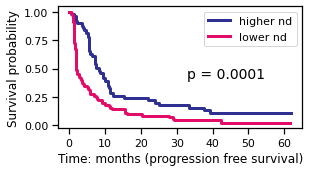

In [16]:
#PFS survival analysis
%matplotlib inline
from lifelines.plotting import add_at_risk_counts
from lifelines import KaplanMeierFitter
from lifelines.datasets import load_waltons
from sksurv.compare import compare_survival
import numpy as np

#### log rank test 
y = df_os[["PFS_CNSR","PFS"]].values
y = np.array([ (i[0],i[1]) for i in y],dtype="bool,f")
group_indicator = ["high" if i > determined_diff else "low" for i in df_os[tar]] 
chi2, pvalue= compare_survival(y,group_indicator)

ix = ix = df_os[tar] >= determined_diff

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.3, 2.5))

kmf_control = KaplanMeierFitter()
ax = kmf_control.fit(df_os.loc[ix]["PFS"], df_os.loc[ix]["PFS_CNSR"], label='higher nd').plot_survival_function(ax=ax,ci_show =False,color='#2e3092')

kmf_exp = KaplanMeierFitter()
ax = kmf_exp.fit(df_os.loc[~ix]["PFS"], df_os.loc[~ix]["PFS_CNSR"], label='lower nd').plot_survival_function(ax=ax,ci_show =False,color='#e40c69')


from lifelines.plotting import add_at_risk_counts
#add_at_risk_counts(kmf_exp, kmf_control, ax=ax)

ax.text(0.53, 0.5, "p = "+str(round(pvalue,4)), transform=ax.transAxes, fontsize=14,
        verticalalignment='top')

plt.ylabel("Survival probability")
plt.xlabel("Time: months (progression free survival)")
plt.tight_layout()
plt.savefig(f'f1_{sampleGroup}_pfs.tif',dpi=600)
plt.savefig(f'f1_{sampleGroup}_pfs.svg',dpi=600)
plt.show()
plt.close()